# Imports

In [23]:
from pathlib import Path
import typing as t

from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Read Files

In [4]:
# Data folders
__name__ = 'mel_spectrograms.ipynb'
raw_data_filepath = Path(__name__).resolve().parents[1] / 'data' / 'raw'
assert raw_data_filepath.exists()
wav_files_folder = raw_data_filepath / 'wav'
assert wav_files_folder.exists()

# Check if wav files are ok
wav_files = [file for file in wav_files_folder.glob("*.wav")]
assert len(wav_files) == 50
for wav_file in wav_files:
    assert wav_file.is_file()
    assert wav_file.exists()

## Check some Audios

In [48]:
# Just for the sake of testing
Audio(
    str(wav_files[0])
)

In [49]:
Audio(
    str(wav_files[42])
)

# Functions

In [37]:
def load_sound_files(files: t.List[Path]) -> t.List[t.Dict[str, int | str | np.ndarray]]:
    """Load sound files with librosa load function.

    Parameters
    ----------
    files : t.List[Path]
        A list containing the path to each wav file to load.

    Returns
    -------
    t.List[t.Dict[str, int | str | np.ndarray]]
        a list of dictionaries containing audio samples, sample rate and file name.
    """
    list_of_info = list()
    for file_path in files:
        info = dict()
        info['filename'] = str(file_path)
        samples, sample_rate = librosa.load(str(file_path),
                                            sr = None)
        info['samples'] = samples
        info['sample_rate'] = sample_rate
        list_of_info.append(info)
    return list_of_info

def mel_spectrogram(samples: np.ndarray,
                    sample_rate: int) -> np.ndarray:
    """Generate a mel spectrogram

    Parameters
    ----------
    samples : np.ndarray
        Audio file's samples.
    sample_rate : int
        Audio file's sample rate.

    Returns
    -------
    np.ndarray
        Mel Spectrogram (Frequency info) in Decibel Scale (Amplitude Info).
    """
    sgram = librosa.stft(samples)
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, 
                                                     sr=sample_rate)
    # use the decibel scale to get the final Mel Spectrogram
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, 
                                        ref=np.min)
    return mel_sgram

def plot_mel_spectrogram(samples: np.ndarray,
                         sample_rate: int,
                         tune_name: str = 'Tune'):
    """Plot Mel Spectrogram

    Parameters
    ----------
    samples : np.ndarray
        Audio file's samples.
    sample_rate : int
        Audio file's sample rate.
    tune_name: str
        Tune title for plot. Default to 'Tune'.
    """
    mel_sgram = mel_spectrogram(samples,sample_rate)
    librosa.display.specshow(mel_sgram, 
                             sr=sample_rate,
                             x_axis='time', 
                             y_axis='mel')
    plt.title(tune_name)
    plt.colorbar(format='%+2.0f dB')    

# Load Sound Files

In [14]:
chiptunes_info = load_sound_files(wav_files)

# Let's check there is just a single samplerate.
samplerates = [info['sample_rate'] for info in chiptunes_info]
assert len(set(samplerates)) == 1

# Convert to Mel Spectograms

## Check some files

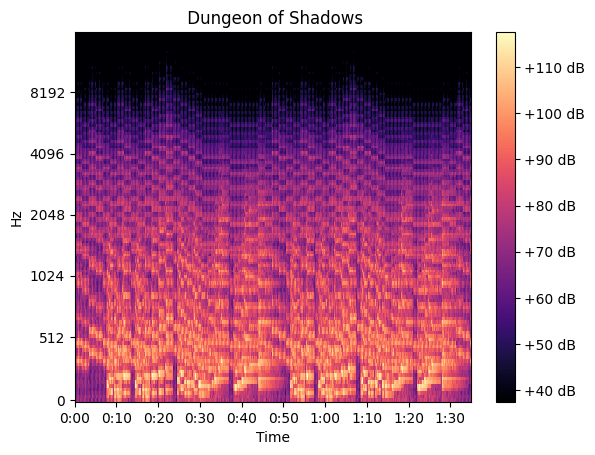

In [43]:
it = 0
title = Path(chiptunes_info[it]['filename']).name.split('.')[1]
plot_mel_spectrogram(
    chiptunes_info[it]['samples'],
    chiptunes_info[it]['sample_rate'],
    title
)

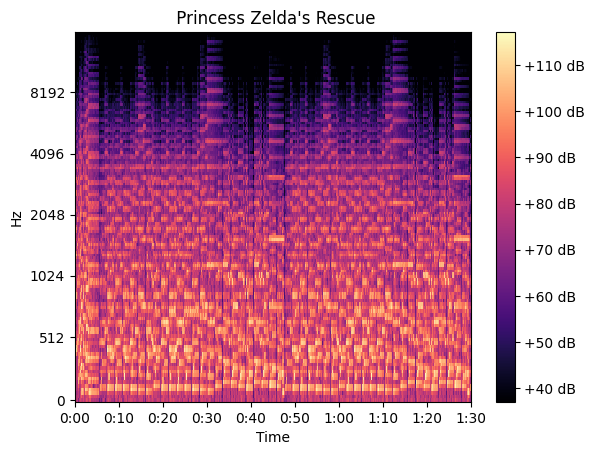

In [46]:
it = 7
title = Path(chiptunes_info[it]['filename']).name.split('.')[1]
plot_mel_spectrogram(
    chiptunes_info[it]['samples'],
    chiptunes_info[it]['sample_rate'],
    title
)

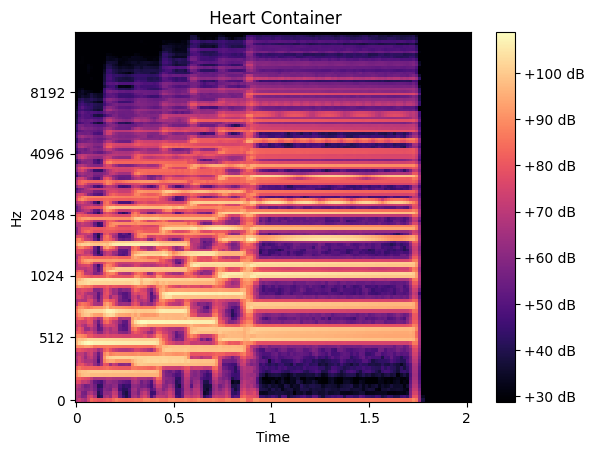

In [47]:
it = 42
title = Path(chiptunes_info[it]['filename']).name.split('.')[1]
plot_mel_spectrogram(
    chiptunes_info[it]['samples'],
    chiptunes_info[it]['sample_rate'],
    title
)